In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
date_logs = pd.read_csv('logs.csv')
date_logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [3]:
date_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [4]:
date_user_data = pd.read_csv('user_data.csv')
date_user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [5]:
date_user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [6]:
date_logs.platform.nunique()

3

In [7]:
success_count = date_logs.loc[date_logs.success == True].client.value_counts()

max_num = success_count.max()

max_success_users = success_count.loc[success_count == max_num]
max_success_users


client
61473    41
78349    41
36165    41
61468    41
92584    41
28719    41
82563    41
52870    41
12179    41
Name: count, dtype: int64

In [8]:
max_success_users.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

In [9]:
platform_count = date_logs.loc[date_logs.success == True].platform.value_counts().idxmax()

platform_count

'phone'

С мобильной платформы было осуществлено наибольшее количество успешных заявок.

In [10]:
premium_date = date_user_data.merge(date_logs, how = 'inner', on = 'client')
premium_date

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [11]:
premium_date.loc[premium_date.premium == True].platform.value_counts().idxmax()

'phone'

Среди премиум-клиентов наиболее популярна для использования мобильная платформа.

In [12]:
if premium_date.isna().any().any():
	print("Есть пропущенные значения.")
	premium_date.fillna(value = {'premium' : False}, inplace = True)

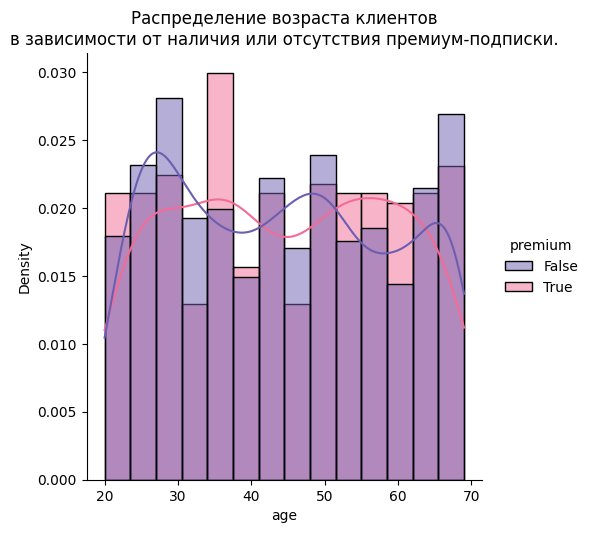

In [13]:
custom_colors = ["#6C5EB0", "#F36C96"]
sns.set_palette(custom_colors)

sns.displot(data = premium_date, 
		   x = 'age',
		   hue = 'premium',
		   kde = True,
		   kind = 'hist',
		   stat = 'density',
		   common_norm = False,
		   bins = 14,
		   )
plt.title('Распределение возраста клиентов\nв зависимости от наличия или отсутствия премиум-подписки.')

sns.despine()

In [14]:
success_count = date_logs.loc[date_logs.success == True].client.value_counts()
success_count = success_count.rename('successes')
success_count

client
61473    41
78349    41
36165    41
61468    41
92584    41
         ..
50300     1
51575     1
3553      1
502       1
11983     1
Name: successes, Length: 2845, dtype: int64

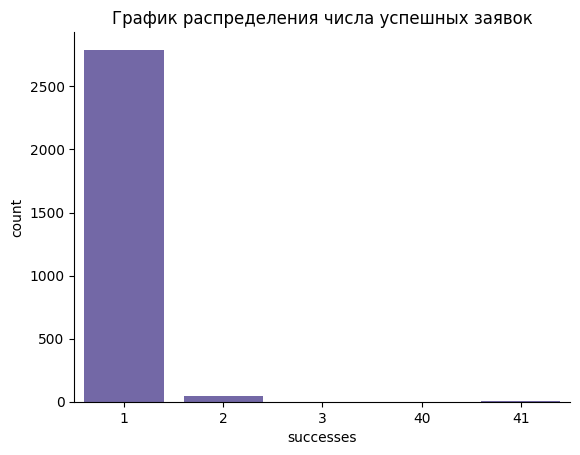

In [15]:
sns.countplot(x = success_count)
plt.title('График распределения числа успешных заявок')
sns.despine()

Более 40 успешных заявок совершили лишь немногие клиенты. В большинстве случаев клиенты ограничивались одной успешной заявкой.

In [16]:
full_dateframe = date_logs.merge(date_user_data, how = 'inner', on = 'client')
full_dateframe

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [17]:
computor_platform = (full_dateframe
					 .loc[(full_dateframe.platform == 'computer') & (full_dateframe.success == True)])

tablet_platform = (full_dateframe
				   .loc[(full_dateframe.platform == 'tablet') & (full_dateframe.success == True)])

phone_platform = (full_dateframe
				  .loc[(full_dateframe.platform == 'phone') & (full_dateframe.success == True)])


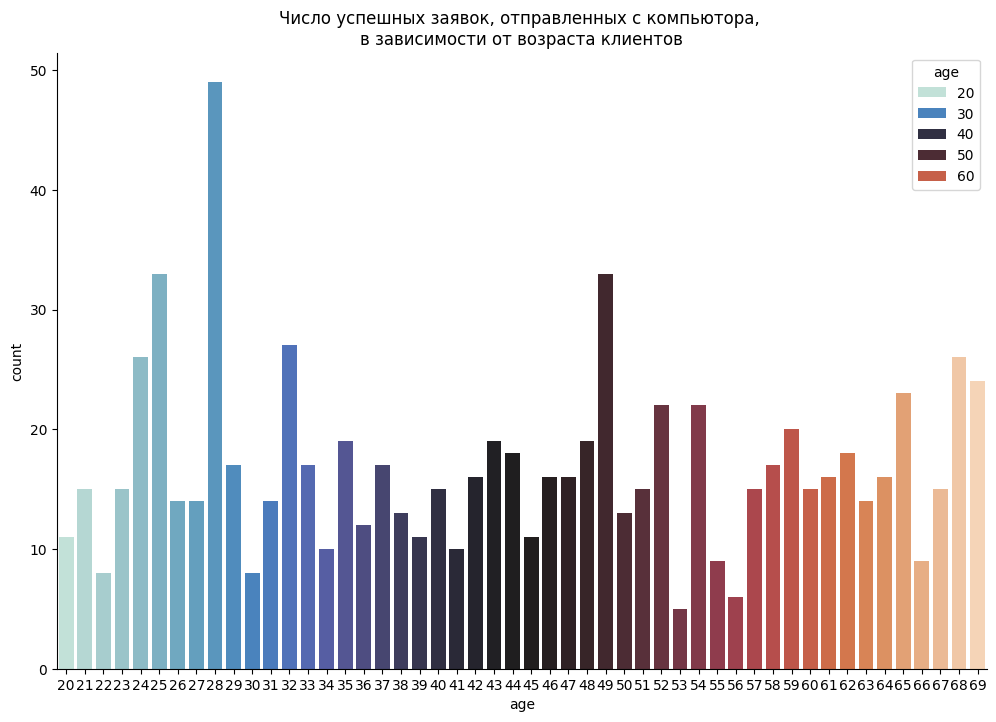

In [18]:
plt.figure(figsize = (12, 8))
sns.countplot(data = computor_platform,
			  x = 'age',
			  hue = 'age',
			  palette = "icefire")

plt.title('Число успешных заявок, отправленных с компьютора, \nв зависимости от возраста клиентов')

sns.despine()

Наибольшее количество успешных заявок было отправлено пользователями в возрасте 28 лет, тогда как наименьшее количество — пользователями в возрасте 53 года.

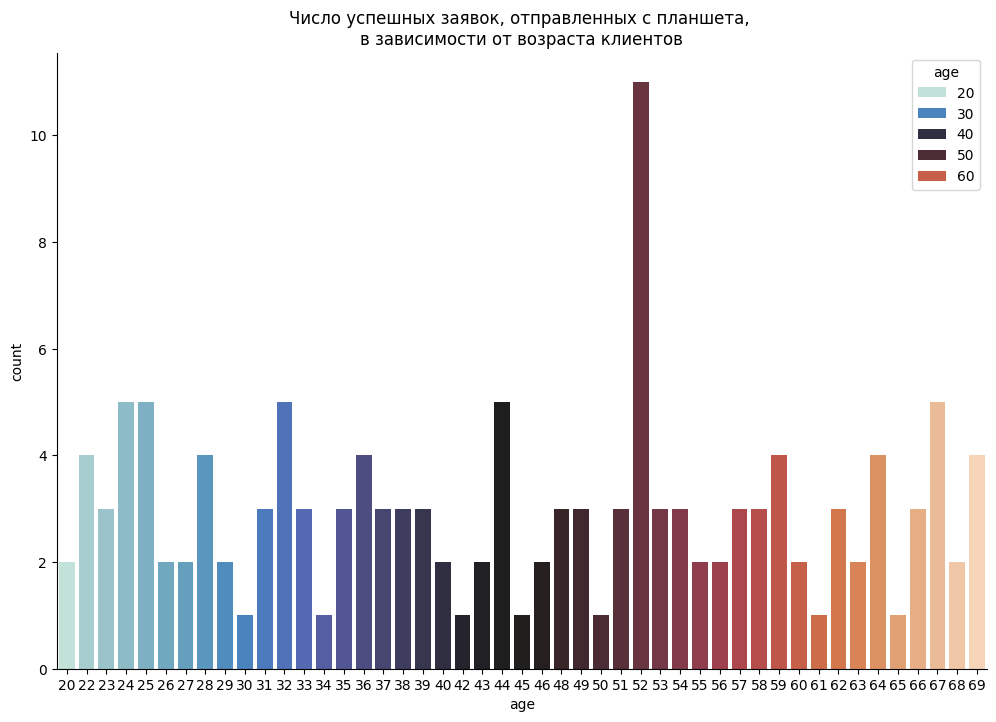

In [19]:
plt.figure(figsize = (12, 8))
sns.countplot(data = tablet_platform,
			  x = 'age',
			  hue = 'age',
			  palette = "icefire")

plt.title('Число успешных заявок, отправленных с планшета, \nв зависимости от возраста клиентов')

sns.despine()

Наибольшее количество успешных заявок было отправлено пользователями в возрасте 52 лет, тогда как наименьшее количество — пользователями в возрасте 30, 34, 42, 45, 50, 61 и 65 лет.

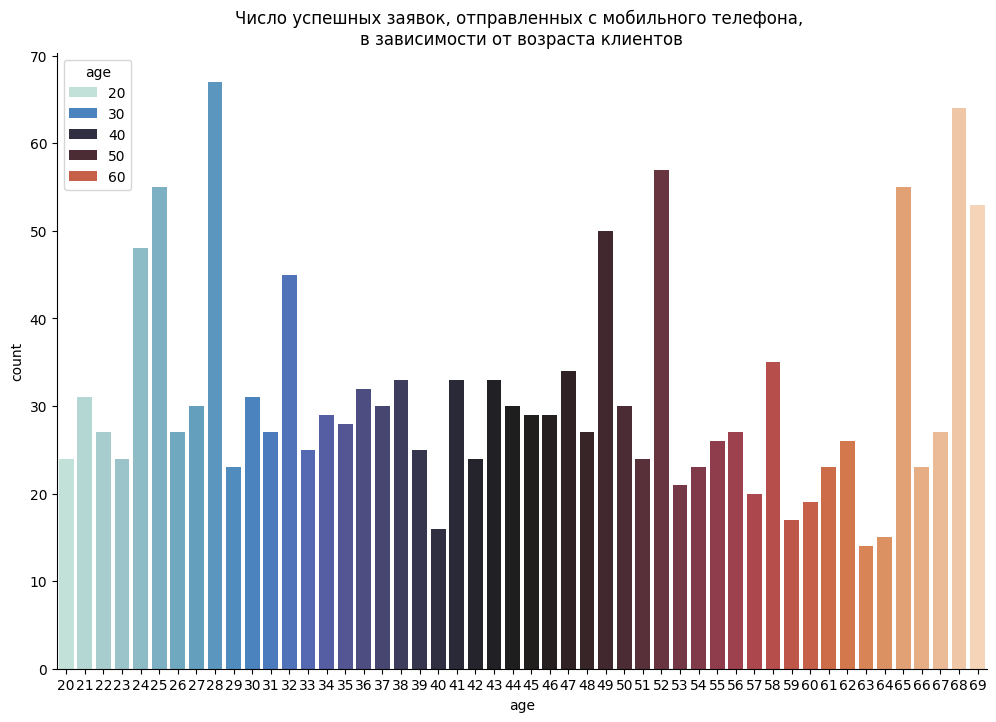

In [20]:
plt.figure(figsize = (12, 8))
sns.countplot(data = phone_platform,
			  x = 'age',
			  hue = 'age',
			  palette = "icefire")

plt.title('Число успешных заявок, отправленных с мобильного телефона, \nв зависимости от возраста клиентов')

sns.despine()

Наибольшее количество успешных заявок было отправлено пользователями в возрасте 28 лет, тогда как наименьшее количество — пользователями в возрасте 40 и 63 лет.